### Auto MPG 데이터셋을 사용하여 1970년대 후반과 1980년대 초반의 자동차 연비를 예측하는 모델을 만듭니다. 이 정보에는 실린더 수, 배기량, 마력(horsepower), 공차 중량 같은 속성이 포함됩니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# auto-mpg.csv

In [ ]:
# 구글 드라이브 마운트


파일은 auto-mpg.csv 입니다.

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML2/data/auto-mpg.csv')

In [3]:
df

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [4]:
# 1  빈데이터 확인
df.isna().sum()

mpg       0
cyl       0
displ     0
hp        0
weight    0
accel     0
yr        0
origin    0
name      0
dtype: int64

In [5]:
# 2 빈 데이터 삭제
df.dropna(inplace=True)

In [ ]:
# 3. X , y 셋팅

In [7]:
y = df['mpg']

In [10]:
X = df.iloc[ : , 1 : -2+1  ]

In [ ]:
# 4. 카테고리컬 데이터 처리
# Origin 컬럼은 다음과 같다. (1. American, 2. European,3. Japanese).

In [11]:
X

,cyl,displ,hp,weight,accel,yr,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...
387,4,140.0,86,2790,15.6,82,1
388,4,97.0,52,2130,24.6,82,2
389,4,135.0,84,2295,11.6,82,1
390,4,120.0,79,2625,18.6,82,1


In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
from sklearn.compose import ColumnTransformer

In [14]:
X.head(1)

,cyl,displ,hp,weight,accel,yr,origin
0,8,307.0,130,3504,12.0,70,1


In [15]:
ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [6])], remainder='passthrough')

In [17]:
X = ct.fit_transform(X)

In [21]:
X = pd.DataFrame(X).drop(0, axis= 1).values

In [ ]:
# 5. X 만 피처 스케일링 하시오 (차트 확인을 위해, y는 하지 않습니다.)

In [23]:
# prompt: 스탠다드 스케일러 만들어줘

from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

In [24]:
X

array([[-0.45812285, -0.50239045,  1.48394702, ...,  0.62054034,
        -1.285258  , -1.62531533],
       [-0.45812285, -0.50239045,  1.48394702, ...,  0.84333403,
        -1.46672362, -1.62531533],
       [-0.45812285, -0.50239045,  1.48394702, ...,  0.54038176,
        -1.64818924, -1.62531533],
       ...,
       [-0.45812285, -0.50239045, -0.86401356, ..., -0.80463202,
        -1.4304305 ,  1.63640964],
       [-0.45812285, -0.50239045, -0.86401356, ..., -0.41562716,
         1.11008813,  1.63640964],
       [-0.45812285, -0.50239045, -0.86401356, ..., -0.30364091,
         1.40043312,  1.63640964]])

In [25]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64

In [28]:
# prompt: 스탠다드 스케일러 만들어줘

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [29]:
y

array([[-0.69863841],
       [-1.08349824],
       [-0.69863841],
       [-0.95521163],
       [-0.82692502],
       [-1.08349824],
       [-1.21178485],
       [-1.21178485],
       [-1.21178485],
       [-1.08349824],
       [-1.08349824],
       [-1.21178485],
       [-1.08349824],
       [-1.21178485],
       [ 0.07108125],
       [-0.18549197],
       [-0.69863841],
       [-0.31377858],
       [ 0.45594109],
       [ 0.32765448],
       [ 0.19936787],
       [ 0.07108125],
       [ 0.19936787],
       [ 0.32765448],
       [-0.31377858],
       [-1.72493129],
       [-1.72493129],
       [-1.59664468],
       [-1.8532179 ],
       [ 0.45594109],
       [ 0.5842277 ],
       [ 0.19936787],
       [-0.5703518 ],
       [-0.95521163],
       [-0.82692502],
       [-0.5703518 ],
       [-0.69863841],
       [-1.21178485],
       [-1.21178485],
       [-1.21178485],
       [-1.21178485],
       [-1.46835807],
       [-1.34007146],
       [-1.34007146],
       [-0.69863841],
       [-0

In [ ]:
# 5. 트레인 / 테스트용 셋으로 분리

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 딥러닝 모델링

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [35]:
def build_model():
  model = Sequential()
  model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(1, activation = 'linear'))
  model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
  return model

In [53]:
model = build_model()

In [ ]:
## epoch_history 객체에 저장된 통계치를 사용해 모델의 훈련 과정을 시각화!

In [54]:
epoch_history = model.fit(X_train, y_train, epochs = 500, validation_split=0.2)

Epoch 1/500
8/8 [==============================] - 2s 64ms/step - loss: 0.7985 - mae: 0.6972 - val_loss: 0.5599 - val_mae: 0.5693
Epoch 2/500
8/8 [==============================] - 0s 11ms/step - loss: 0.3357 - mae: 0.4169 - val_loss: 0.2925 - val_mae: 0.4060
Epoch 3/500
8/8 [==============================] - 0s 11ms/step - loss: 0.2464 - mae: 0.3789 - val_loss: 0.2266 - val_mae: 0.3466
Epoch 4/500
8/8 [==============================] - 0s 12ms/step - loss: 0.1999 - mae: 0.3370 - val_loss: 0.1871 - val_mae: 0.3156
Epoch 5/500
8/8 [==============================] - 0s 14ms/step - loss: 0.1712 - mae: 0.2982 - val_loss: 0.1853 - val_mae: 0.3060
Epoch 6/500
8/8 [==============================] - 0s 12ms/step - loss: 0.1534 - mae: 0.2828 - val_loss: 0.1716 - val_mae: 0.2969
Epoch 7/500
8/8 [==============================] - 0s 12ms/step - loss: 0.1413 - mae: 0.2747 - val_loss: 0.1562 - val_mae: 0.2900
Epoch 8/500
8/8 [==============================] - 0s 11ms/step - loss: 0.1338 - mae: 0.26

In [ ]:
##### Vaildation #########

# 밸리데이션이란, 에포크가 한번 끝날때 마다, 학습에 사용하지 않은 데이터로
# 시험을 보는 것을 말한다.

# 테스트란? 인공지능 학습이 완전히 다 끝났을때 평가하는것을 테스트라고 하고
# 밸리데이션? 에포크가 끝날때마다 평가하는것을 말한다.


In [55]:
epoch_history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [56]:
epoch_history.history['loss']

[0.798545241355896,
 0.33565762639045715,
 0.24639078974723816,
 0.1998710185289383,
 0.17124253511428833,
 0.15343181788921356,
 0.14129936695098877,
 0.13379408419132233,
 0.12721073627471924,
 0.12171796709299088,
 0.11649621278047562,
 0.11333328485488892,
 0.11089396476745605,
 0.10712122917175293,
 0.10486186295747757,
 0.10330137610435486,
 0.10105258226394653,
 0.09912241995334625,
 0.09794265031814575,
 0.0961620882153511,
 0.09646041691303253,
 0.09291886538267136,
 0.09352414309978485,
 0.09251588582992554,
 0.09114784747362137,
 0.08958722651004791,
 0.08945884555578232,
 0.08815894275903702,
 0.08779462426900864,
 0.0868842750787735,
 0.0904196947813034,
 0.08470125496387482,
 0.0855800211429596,
 0.08450227230787277,
 0.08334998786449432,
 0.08297143876552582,
 0.082094706594944,
 0.08350173383951187,
 0.08041473478078842,
 0.08068664371967316,
 0.08262770622968674,
 0.07996208220720291,
 0.07881574332714081,
 0.07951781153678894,
 0.07902049273252487,
 0.0765591561794281

In [57]:
epoch_history.history['val_loss']

[0.559909462928772,
 0.29252785444259644,
 0.22656480967998505,
 0.18708522617816925,
 0.18534903228282928,
 0.17163904011249542,
 0.15619607269763947,
 0.15166373550891876,
 0.146255761384964,
 0.14232362806797028,
 0.13951659202575684,
 0.13702510297298431,
 0.1322793960571289,
 0.12442682683467865,
 0.1327163428068161,
 0.1256031095981598,
 0.12387748062610626,
 0.11981460452079773,
 0.12058830261230469,
 0.12342600524425507,
 0.12750986218452454,
 0.11470799893140793,
 0.116099052131176,
 0.12396225333213806,
 0.11978708207607269,
 0.12134689837694168,
 0.11674366146326065,
 0.11918123811483383,
 0.11888335645198822,
 0.12167983502149582,
 0.11503255367279053,
 0.1304555982351303,
 0.11883487552404404,
 0.11708792299032211,
 0.12009498476982117,
 0.12302736192941666,
 0.11616076529026031,
 0.12283376604318619,
 0.11809088289737701,
 0.12061586230993271,
 0.12032251805067062,
 0.12731483578681946,
 0.11646066606044769,
 0.12821310758590698,
 0.11667577177286148,
 0.12683136761188507

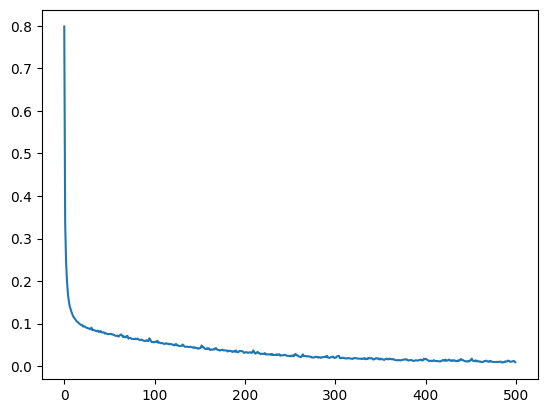

In [58]:
plt.plot(epoch_history.history['loss'])
plt.show()

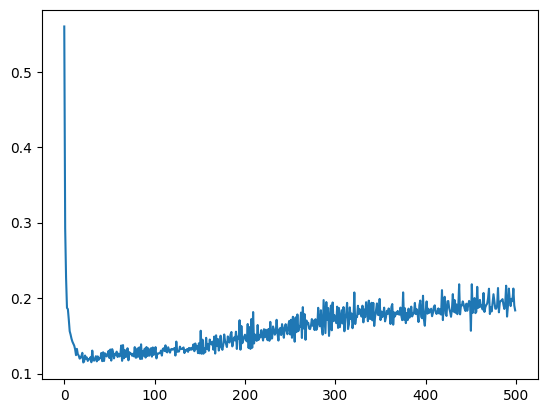

In [59]:
plt.plot(epoch_history.history['val_loss'])
plt.show()

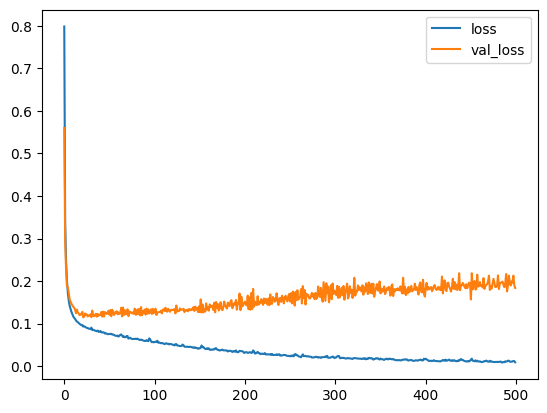

In [62]:
plt.plot(epoch_history.history['loss'])
plt.plot(epoch_history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.savefig('loss.jpg')
plt.show()

이 그래프를 보면 수 백번 에포크를 진행한 이후에는 모델이 거의 향상되지 않는 것 같습니다. model.fit 메서드를 수정하여 검증 점수가 향상되지 않으면 자동으로 훈련을 멈추도록 만들어 보죠. 에포크마다 훈련 상태를 점검하기 위해 EarlyStopping 콜백(callback)을 사용하겠습니다. 지정된 에포크 횟수 동안 성능 향상이 없으면 자동으로 훈련이 멈춥니다.

이 콜백에 대해 더 자세한 내용은 여기를 참고하세요.[링크 텍스트](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)